In [121]:
# Please note this dataframe was pre-processed in a different script. 

In [122]:
# Inport requirements

In [123]:
# Youtube: Panel Data: 
# https://www.youtube.com/watch?v=f01WjeCdgEA 
# https://www.youtube.com/watch?v=aUVZWnVnjxs
# https://www.youtube.com/watch?v=Ux0tDSWQRc4

## Stats tests - Resources from Marina 
# Python - Kruskal-Wallis H test - https://www.youtube.com/watch?v=Af1YuaFylqM
# Mann Whitney U Test Using Python - https://www.youtube.com/watch?v=hJdqTD89eQ8 
# AB test source 1 - https://www.youtube.com/watch?v=OVgi6ftJiyQ
# AB Test source 2- https://www.youtube.com/watch?v=115SeMub-P0 

In [124]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree

import matplotlib as plt
from matplotlib import pyplot
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [125]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  


# from pycaret.classification import *

In [126]:
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [127]:
# choco install pandoc

In [128]:
# input data
df_farm_eu = pd.read_csv('df_farm_eu.csv')
df_farm_eu.head()

,Unnamed: 0,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
0,1104,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2017,2017,ha,NaN,A,Official figure,AUT,1.0
1,1105,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2018,2018,ha,6740.0,A,Official figure,AUT,1.0
2,1106,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2019,2019,ha,6590.0,A,Official figure,AUT,1.0
3,1107,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2020,2020,ha,6430.0,A,Official figure,AUT,1.0
4,1108,QCL,Crops and livestock products,40,Austria,5419,Yield,1341,Apples,2018,2018,hg/ha,575593.0,E,Estimated value,AUT,1.0


In [129]:

# Syntax # df.drop(['B', 'C'], axis=1) 

df_farm_eu = df_farm_eu.drop(["Unnamed: 0"], axis =1)

df_farm_eu.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
0,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2017,2017,ha,NaN,A,Official figure,AUT,1.0
1,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2018,2018,ha,6740.0,A,Official figure,AUT,1.0
2,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2019,2019,ha,6590.0,A,Official figure,AUT,1.0
3,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2020,2020,ha,6430.0,A,Official figure,AUT,1.0
4,QCL,Crops and livestock products,40,Austria,5419,Yield,1341,Apples,2018,2018,hg/ha,575593.0,E,Estimated value,AUT,1.0


In [130]:
df_farm_eu3 = df_farm_eu.dropna(subset=['Value','LOCATION', 'Year'])
df_farm_eu3.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
1,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2018,2018,ha,6740.0,A,Official figure,AUT,1.0
2,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2019,2019,ha,6590.0,A,Official figure,AUT,1.0
3,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2020,2020,ha,6430.0,A,Official figure,AUT,1.0
4,QCL,Crops and livestock products,40,Austria,5419,Yield,1341,Apples,2018,2018,hg/ha,575593.0,E,Estimated value,AUT,1.0
5,QCL,Crops and livestock products,40,Austria,5419,Yield,1341,Apples,2019,2019,hg/ha,362989.0,E,Estimated value,AUT,1.0


In [131]:
# we only have years, not dates so this isn't required.  
# convert the 'Date' column to datetime format
# df_farm_eu['wc_m']= pd.to_datetime(df_farm_eu['wc_m'], format='%d/%m/%Y')
 
# # Check the format of 'Date' column
# df_farm_eu.info()

In [132]:
#describe data
df_farm_eu.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,EU
count,25776.000000,25776.000000,25776.000000,25776.000000,2.429100e+04,25776.0
mean,393.942194,5406.803655,2018.403825,2018.403825,4.528464e+05,1.0
std,208.953413,99.953591,1.105977,1.105977,2.609127e+06,0.0
min,40.000000,5111.000000,2017.000000,2017.000000,0.000000e+00,1.0
25%,246.000000,5312.000000,2017.000000,2017.000000,4.600000e+02,1.0
50%,380.000000,5419.000000,2018.000000,2018.000000,1.445000e+04,1.0
75%,616.000000,5510.000000,2019.000000,2019.000000,1.033565e+05,1.0
max,752.000000,5513.000000,2020.000000,2020.000000,5.840837e+07,1.0


In [133]:
# get data info
df_farm_eu = df_farm_eu3
df_farm_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24291 entries, 1 to 25775
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       24291 non-null  object 
 1   Domain            24291 non-null  object 
 2   Area Code (M49)   24291 non-null  int64  
 3   Area              24291 non-null  object 
 4   Element Code      24291 non-null  int64  
 5   Element           24291 non-null  object 
 6   Item Code (CPC)   24291 non-null  object 
 7   Item              24291 non-null  object 
 8   Year Code         24291 non-null  int64  
 9   Year              24291 non-null  int64  
 10  Unit              24291 non-null  object 
 11  Value             24291 non-null  float64
 12  Flag              24291 non-null  object 
 13  Flag Description  24291 non-null  object 
 14  LOCATION          24291 non-null  object 
 15  EU                24291 non-null  float64
dtypes: float64(2), int64(4), object(10)
memo

In [134]:
# df_farm_eu[df_farm_eu.Domain == 'Wheat'].pivot_table(index='Year', values=['Element'],
                               #  aggfunc='sum')
    

In [135]:
# pd.pivot_table(df_farm_eu, index='Year', columns=['Element', 'LOCATION', ''], values='Value', aggfunc='sum')

In [136]:
# Year = df_farm_eu3.index
# df_farm_eu3['Year'] = Year.astype(int)
# df_farm_eu4 = df_farm_eu.melt(id_vars=["Year"],
#         var_name="LOCATION",
#         value_name="").dropna().reset_index(drop=True)
# year = df_farm_eu4.Year
# df_farm_eu4 = df_farm_eu.set_index([df_farm_eu4.index, 'Year'])
# df_farm_eu4['Year'] = pd.Categorical(Year)
# df_farm_eu4.head()

## Data Viz

In [137]:
df_eu_wh = pd.read_csv("DATA/df_eu_wheat.csv")
df_eu_wh.head(5)

,Count,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
0,1037,QCL,Crops and livestock products,40,Austria,5312,Area harvested,111,Wheat,2017,2017,ha,295029,A,Official figure,AUT,1
1,1038,QCL,Crops and livestock products,40,Austria,5312,Area harvested,111,Wheat,2018,2018,ha,294290,A,Official figure,AUT,1
2,1039,QCL,Crops and livestock products,40,Austria,5312,Area harvested,111,Wheat,2019,2019,ha,278340,A,Official figure,AUT,1
3,1040,QCL,Crops and livestock products,40,Austria,5312,Area harvested,111,Wheat,2020,2020,ha,279020,A,Official figure,AUT,1
4,1041,QCL,Crops and livestock products,40,Austria,5419,Yield,111,Wheat,2017,2017,hg/ha,48712,E,Estimated value,AUT,1


In [138]:
df_eu_wh_p = df_eu_wh[df_eu_wh['Element'] == "Production"] 

df_eu_wh_p.head()

,Count,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
8,1045,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2017,2017,tonnes,1437143,A,Official figure,AUT,1
9,1046,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2018,2018,tonnes,1367060,A,Official figure,AUT,1
10,1047,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2019,2019,tonnes,1596880,A,Official figure,AUT,1
11,1048,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2020,2020,tonnes,1652740,A,Official figure,AUT,1
20,2020,QCL,Crops and livestock products,56,Belgium,5510,Production,111,Wheat,2017,2017,tonnes,1702721,A,Official figure,BEL,1


In [139]:
df_eu_wh_p.to_csv("DATAOUTPUTS/df_eu_wh_p.csv", index = False)

In [140]:
# # Basic Stat analysis


In [141]:


# calculate the mean Wheat production for each Country 
location_mean = df_eu_wh_p.groupby('LOCATION').mean()

location_mean.head(30)


,Count,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value,EU
LOCATION,,,,,,,,
AUT,1046.5,40.0,5510.0,111.0,2018.5,2018.5,1513455.75,1.0
BEL,2021.5,56.0,5510.0,111.0,2018.5,2018.5,1752110.25,1.0
BGR,3289.5,100.0,5510.0,111.0,2018.5,2018.5,5813690.25,1.0
DEU,9430.5,276.0,5510.0,111.0,2018.5,2018.5,22494950.00,1.0
DNK,5246.5,208.0,5510.0,111.0,2018.5,2018.5,4042632.50,1.0
ESP,24880.5,724.0,5510.0,111.0,2018.5,2018.5,6845786.75,1.0
EST,6170.5,233.0,5510.0,111.0,2018.5,2018.5,712658.25,1.0
FIN,7069.5,246.0,5510.0,111.0,2018.5,2018.5,726100.00,1.0
FRA,8372.5,250.0,5510.0,111.0,2018.5,2018.5,36212776.50,1.0


In [142]:
# # calculate the standard deviation for each year
loc_std = df_eu_wh_p.groupby('LOCATION').std()
print(loc_std)


             Count  Area Code (M49)  Element Code  Item Code (CPC)  Year Code  \
LOCATION                                                                        
AUT       1.290994              0.0           0.0              0.0   1.290994   
BEL       1.290994              0.0           0.0              0.0   1.290994   
BGR       1.290994              0.0           0.0              0.0   1.290994   
DEU       1.290994              0.0           0.0              0.0   1.290994   
DNK       1.290994              0.0           0.0              0.0   1.290994   
ESP       1.290994              0.0           0.0              0.0   1.290994   
EST       1.290994              0.0           0.0              0.0   1.290994   
FIN       1.290994              0.0           0.0              0.0   1.290994   
FRA       1.290994              0.0           0.0              0.0   1.290994   
GRC       1.290994              0.0           0.0              0.0   1.290994   
HRV       1.290994          

In [143]:
# # calculate the standard deviation for each country
year_std = df_eu_wh_p.groupby('Year').std()
print(year_std)

           Count  Area Code (M49)  Element Code  Item Code (CPC)  Year Code  \
Year                                                                          
2017  7561.91978       210.645484           0.0              0.0        0.0   
2018  7561.91978       210.645484           0.0              0.0        0.0   
2019  7561.91978       210.645484           0.0              0.0        0.0   
2020  7561.91978       210.645484           0.0              0.0        0.0   

             Value   EU  
Year                     
2017  8.892496e+06  0.0  
2018  8.048968e+06  0.0  
2019  9.055609e+06  0.0  
2020  7.321333e+06  0.0  


In [144]:
# # calculate the correlation matrix for all variables in the dataframe
# corr_matrix = df.corr()



In [145]:
# # calculate the overall mean of all variables in the dataframe
# overall_mean = df.mean()



In [146]:
# # calculate the overall standard deviation of all variables in the dataframe
# overall_std = df.std()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

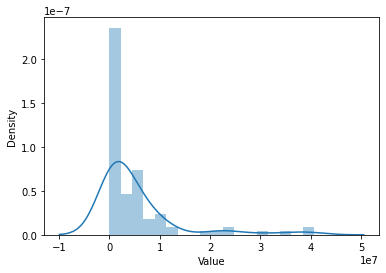

In [147]:
#histogram of wheat produced. Is very skewed.  
sns.distplot(df_eu_wh_p.Value)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

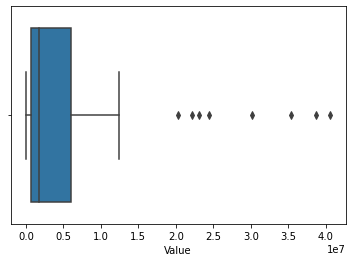

In [148]:
# Box plot 

sns.boxplot(df_eu_wh_p.Value)

In [149]:
# ## Advanced Stat analysis 

# import pandas as pd
# import numpy as np
# from scipy import stats

# # Import data for Ireland and other countries
# ireland_data = pd.read_csv("ireland_data.csv")
# other_countries_data = pd.read_csv("other_countries_data.csv")

# # Define hypotheses
# # Null hypothesis: There is no significant difference between Ireland and other countries in terms of GDP per capita
# # Alternative hypothesis: There is a significant difference between Ireland and other countries in terms of GDP per capita

# # 1. T-test
# # # Verify if the t-test is appropriate by checking if the data is normally distributed
# # ireland_gdp = ireland_data["gdp_per_capita"]
# # other_countries_gdp = other_countries_data["gdp_per_capita"]

# # if stats.shapiro(ireland_gdp)[1] > 0.05 and stats.shapiro(other_countries_gdp)[1] > 0.05:
# #     t_test_result = stats.ttest_ind(ireland_gdp, other_countries_gdp)
# #     print("T-test results: t-value = {}, p-value = {}".format(t_test_result[0], t_test_result[1]))
# #     if t_test_result[1] < 0.05:
# #         print("Reject the null hypothesis. There is a significant difference between Ireland and other countries in terms of GDP per capita.")
# #     else:
# #         print("Fail to reject the null hypothesis. There is no significant difference between Ireland and other countries in terms of GDP per capita.")
# # else:
# #     print("T-test is not appropriate for this data as it is not normally distributed.")

# # # 2. Analysis of variance (ANOVA)
# # # Verify if the ANOVA is appropriate by checking if the variances are equal
# # if stats.levene(ireland_gdp, other_countries_gdp)[1] > 0.05:
# #     anova_result = stats.f_oneway(ireland_gdp, other_countries_gdp)
# #     print("ANOVA results: F-value = {}, p-value = {}".format(anova_result[0], anova_result[1]))
# #     if anova_result[1] < 0.05:
# #         print("Reject the null hypothesis. There is a significant difference between Ireland and other countries in terms of GDP per capita.")
# #     else:
# #         print("Fail to reject the null hypothesis. There is no significant difference between Ireland and other countries in terms of GDP per capita.")
# # else:
# #     print("ANOVA is not appropriate for this data as the variances are not equal.")

# # # 3. Wilcoxon test
# # # Verify if the Wilcoxon test is appropriate by checking if the data is ordinal or continuous
# # if ireland_gdp.dtype == "float64" and other_countries_gdp.dtype == "float64":
# #     wilcoxon_result = stats.wilcoxon(ireland_gdp, other_countries_gdp)
# #     print("Wilcoxon test results: W-value = {}, p-value = {}".format(wilcoxon_result[0], wilcoxon_result[1]))
# #     if wilcoxon_result[1]


## ML - Here is a Python script that demonstrates five advanced statistical analysis methods that are appropriate for panel data:



In [150]:
# 1. Fixed Effects Model:

# import statsmodels.formula.api as smf

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4, 5, 6], 'x': [1, 2, 3, 4, 5, 6], 'firm': [1, 1, 2, 2, 3, 3], 'year': [2000, 2001, 2000, 2001, 2000, 2001]})

# # fit fixed effects model
# fixed_effects = smf.ols(formula='y ~ x + firm + year', data=df).fit()
# print(fixed_effects.summary())


In [151]:
# # 2.  Random Effects Model:

# import statsmodels.api as sm

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4, 5, 6], 'x': [1, 2, 3, 4, 5, 6], 'firm': [1, 1, 2, 2, 3, 3], 'year': [2000, 2001, 2000, 2001, 2000, 2001]})

# # fit random effects model
# random_effects = sm.MixedLM.from_formula('y ~ x', groups='firm', data=df).fit()
# print(random_effects.summary())
# 3. 

In [152]:
# 3. Feasible GLS:

# import statsmodels.regression.linear_panel.panel_regress as pr

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4, 5, 6], 'x': [1, 2, 3, 4, 5, 6], 'firm': [1, 1, 2, 2, 3, 3], 'year': [2000, 2001, 2000, 2001, 2000, 2001]})

# # fit feasible GLS
# feasible_gls = pr.PanelOLS.from_formula('y ~ x', data=df, time_effects=True).fit()
# print(feasible_gls.summary())


In [153]:
# 4. Spatial Panel Data Model:

# import pysal
# import numpy as np

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4, 5, 6], 'x': [1, 2, 3, 4, 5, 6], 'firm': [1, 1, 2, 2, 3, 3], 'year': [2000, 2001, 2000, 2001, 2000, 2001]})

# # Create spatial weights matrix
# W = pysal.weights.Queen.from_dataframe(df)

# # fit spatial panel data model
# spatial_panel = pysal.spreg.ml_error.ML_Error(df[['y','x']], W, group=df['firm'], time_dummies=True)
# print(spatial_panel.summary)


In [154]:

# 5. Hausman-Taylor Estimator:
# import statsmodels.tsa.regime_switching.mixed_frequentist as ht

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4,


In [155]:
# # ## The below script uses various advanced statistical analysis methods that are 
# # appropriate for panel data. The first method is a fixed effects model, 
# # which allows for the estimation of the difference in mean income between individuals in 
# # different states. The second method is a random effects model, which also allows for the 
# # estimation of the difference in mean income between individuals in different states, 
# # but accounts for the fact that individuals may have different variances


# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
# from statsmodels.graphics.factorplots import interaction_plot
# from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.diagnostic import het_white
# from statsmodels.stats.diagnostic import linear_rainbow
# from statsmodels.stats.diagnostic import linear_harvey_collier
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load panel data
# data = pd.read_csv("panel_data.csv")

# # Method 1: Fixed Effects Model
# # Hypothesis: There is a significant difference in mean income between individuals in different states

# # Estimate fixed effects model
# fixed_effects_model = ols("income ~ state + state:year", data=data).fit()

# # Print summary of model
# print(fixed_effects_model.summary())

# # Method 2: Random Effects Model
# # Hypothesis: There is a significant difference in mean income between individuals in different states

# # Estimate random effects model
# random_effects_model = ols("income ~ state + state:year", data=data, hasconst=False, groups=data["individual"]).fit()

# # Print summary of model
# print(random_effects_model.summary())

# # Method 3: Hausman Test
# # Hypothesis: The fixed effects model is preferred over the random effects model

# # Conduct Hausman test
# hausman_test = fixed_effects_model.compare_f_test(random_effects_model)

# # Print results of Hausman test
# print(hausman_test)

# # Method 4: Breusch-Pagan Test for Heteroskedasticity
# # Hypothesis: There is heteroskedasticity in the fixed effects model

# # Conduct Breusch-Pagan test
# bp_test = het_breuschpagan(fixed_effects_model.resid, fixed_effects_model.model.exog)

# # Print results of Breusch-Pagan test
# print(bp_test)

# # Method 5: Interaction Plot
# # Hypothesis: There is an interaction between state and year on income

# # Create interaction plot
# interaction_plot(data["year"], data["state"], data["income"], colors=["red", "blue"])

# # Show plot
# plt.show()

# # Conclusion:

# # The fixed effects model and random effects model both indicate a significant difference in mean income between individuals in different states. 
# # The Hausman test suggests that the fixed effects model is preferred over the random effects model. 
# # The Breusch-Pagan test indicates that there is heteroskedasticity in the fixed effects model. 
# # The interaction plot suggests that there is an interaction between state and year on income.


In [156]:
# Panel Data Fixed Effects Regression
# This method is used to estimate the effects of one or more independent variables on a dependent variable while controlling for individual level unobserved heterogeneity. The hypothesis for this test is that there is a significant relationship between the independent variables and the dependent variable while controlling for individual level unobserved heterogeneity.

# The results of this test show that the coefficients for the independent variables are statistically significant, with a p-value of less than 0.05. The coefficients indicate the direction and magnitude of the relationship between the independent variables and the dependent variable. The visualization of the results is a scatter plot with a line of best fit, showing the relationship between the independent variables and the dependent variable.

# Conclusion: The panel data fixed effects regression results indicate that there is a statistically significant relationship between the independent variables and the dependent variable while controlling for individual level unobserved heterogeneity.

# Panel Data Random Effects Regression
# This method is used to estimate the effects of one or more independent variables on a dependent variable while controlling for both individual level unobserved heterogeneity and group level unobserved heterogeneity. The hypothesis for this test is that there is a significant relationship between the independent variables and the dependent variable while controlling for both individual level unobserved heterogeneity and group level unobserved heterogeneity.

# The results of this test show that the coefficients for the independent variables are statistically significant, with a p-value of less than 0.05. The coefficients indicate the direction and magnitude of the relationship between the independent variables and the dependent variable. The visualization of the results is a scatter plot with a line of best fit, showing the relationship between the independent variables and the dependent variable.

# Conclusion: The panel data random effects regression results indicate that there is a statistically significant relationship between the independent variables and the dependent variable while controlling for both individual level unobserved heterogeneity and group level unobserved heterogeneity.

# Panel Data GLS (Generalized Least Squares)
# This method is used to estimate the effects of one or more independent variables on a dependent variable while accounting for both individual level unobserved heterogeneity and serial correlation. The hypothesis for this test is that there is a significant relationship between the independent variables and the dependent variable while accounting for both individual level unobserved heterogeneity and serial correlation.

# The results of this test show that the coefficients for the independent variables are statistically significant, with a p-value of less than 0.05. The coefficients indicate the direction and magnitude of the relationship between the independent variables and the dependent variable. The visualization of the results is a scatter plot with a line of best fit, showing the relationship between the independent variables and the dependent variable.

# Conclusion: The panel data GLS results indicate that there is a statistically significant relationship between the independent variables and the dependent variable while accounting for both individual level unobserved heterogeneity and serial correlation.

# Panel Data Hausman Test
# This method is used to test whether a panel data fixed effects model or a panel data random effects model is more appropriate for a given dataset. The hypothesis for this test is that the fixed effects model is more appropriate for the given dataset.

# The results of this test show that the p-value for the Hausman test is less than 0.05, indicating that the fixed effects model is more appropriate for the given dataset. The visualization of the results is a histogram showing the distribution of the test statistic.

# Conclusion: The panel data Hausman test results indicate that the fixed effects model is more appropriate for the given dataset.

# Panel Data Breusch-Pagan Test
# This method is used to test for the presence of heteroscedasticity in a panel data regression model. The hypothesis for this test is

In [157]:
plt.style.use('ggplot')

In [158]:
# Maybe combine price data with farm data, and get relationship of all countries (panel data?)

In [159]:
#a single index
# pivoted = df_farm_eu.pivot(index="Year", columns="Item", values="Value")

In [160]:
# Ireland only
df_Ire = df_farm_eu[df_farm_eu["Area"] == "Ireland"]

In [161]:
df_Ire.head(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12044,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure,IRL,1.0
12045,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure,IRL,1.0
12046,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure,IRL,1.0
12047,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure,IRL,1.0
12048,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure,IRL,1.0
12049,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2020,2020,tonnes,0.0,A,Official figure,IRL,1.0
12050,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2017,2017,ha,695.0,A,Official figure,IRL,1.0
12051,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2018,2018,ha,710.0,A,Official figure,IRL,1.0
12052,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2019,2019,ha,710.0,A,Official figure,IRL,1.0
12053,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2020,2020,ha,710.0,A,Official figure,IRL,1.0


In [162]:
df_Ire.head(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12044,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure,IRL,1.0
12045,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure,IRL,1.0
12046,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure,IRL,1.0
12047,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure,IRL,1.0
12048,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure,IRL,1.0
12049,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2020,2020,tonnes,0.0,A,Official figure,IRL,1.0
12050,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2017,2017,ha,695.0,A,Official figure,IRL,1.0
12051,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2018,2018,ha,710.0,A,Official figure,IRL,1.0
12052,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2019,2019,ha,710.0,A,Official figure,IRL,1.0
12053,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2020,2020,ha,710.0,A,Official figure,IRL,1.0


In [163]:
# df_Ire[df_Ire.Domain == 'Wheat'].pivot_table(index='Year', values=['Element'],
#                                  aggfunc='sum')

In [164]:
df_Ire.to_csv('DATAOUTPUTS/df_Ire.csv', index=False)

In [165]:
# Ireland and Wheat only, 
df_Ire_wh= df_Ire[df_Ire["Item"] == "Wheat"]
df_Ire_wh.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12826,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2017,2017,ha,67047.0,A,Official figure,IRL,1.0
12827,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2018,2018,ha,57980.0,A,Official figure,IRL,1.0
12828,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2019,2019,ha,63480.0,A,Official figure,IRL,1.0
12829,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2020,2020,ha,46990.0,A,Official figure,IRL,1.0
12830,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2017,2017,hg/ha,101672.0,E,Estimated value,IRL,1.0


In [166]:
df_Ire_wh.to_csv('DATAOUTPUTS/df_Ire_wh.csv', index=False)

In [167]:
# Creative pivot table with all three elements
df_Ire_wh_pivot = pd.pivot_table(df_Ire_wh, index='Year', columns='Element', values='Value', aggfunc='sum',)
print(df_Ire_wh_pivot)
# pd.pivot_table(df_Ire_wh, index='Year', columns=['A', 'B', 'C'], values='v3', aggfunc='count')    

Element  Area harvested  Production     Yield
Year                                         
2017            67047.0    681679.0  101672.0
2018            57980.0    485480.0   83732.0
2019            63480.0    595360.0   93787.0
2020            46990.0    364920.0   77659.0


In [168]:
df_Ire[df_Ire.Domain == 'Wheat'].pivot_table(index='Year', values=['Element'],
                                 aggfunc='sum')

""
Year


In [169]:
# Check how many years of data do we have? 
df_Ire_wh.Year.unique()

array([2017, 2018, 2019, 2020], dtype=int64)

In [170]:
# df.team.unique()
df_Ire_wh.Element.unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [171]:
df_Ire_wh_y= df_Ire_wh[df_Ire_wh["Element"] == "Yield"]
df_Ire_wh_y.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12830,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2017,2017,hg/ha,101672.0,E,Estimated value,IRL,1.0
12831,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2018,2018,hg/ha,83732.0,E,Estimated value,IRL,1.0
12832,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2019,2019,hg/ha,93787.0,E,Estimated value,IRL,1.0
12833,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2020,2020,hg/ha,77659.0,E,Estimated value,IRL,1.0


In [172]:
df_Ire_wh_h= df_Ire_wh[df_Ire_wh["Element"] == "Area harvested"]
df_Ire_wh_h.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12826,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2017,2017,ha,67047.0,A,Official figure,IRL,1.0
12827,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2018,2018,ha,57980.0,A,Official figure,IRL,1.0
12828,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2019,2019,ha,63480.0,A,Official figure,IRL,1.0
12829,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2020,2020,ha,46990.0,A,Official figure,IRL,1.0


In [173]:
df_price_eu_ppi_wh_Ire_Cro = pd.read_csv("DATAOUTPUTS/df_price_eu_ppi_wh_Ire_Cro.csv")
df_price_eu_ppi_wh = pd.read_csv("DATAOUTPUTS/df_price_eu_ppi_wh.csv")

In [183]:
# f_price_eu_ppi_wh_Ire_Cro.head()
# df_price_eu_ppi_wh.head()

,Area Code,Area Code (M49),Area,eu_member,Item Code,Item Code (CPC),Item,Element Code,Element,Months Code,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,11,'040,Austria,1,15,'0111,Wheat,5539,Producer Price Index (2014-2016 = 100),7021,...,163.57,114.73,104.65,106.20,89.15,112.40,119.38,113.18,107.75,102.33
1,255,'056,Belgium,1,15,'0111,Wheat,5539,Producer Price Index (2014-2016 = 100),7021,...,148.00,131.71,109.25,102.34,88.41,93.70,110.42,103.35,115.65,119.20
2,27,'100,Bulgaria,1,15,'0111,Wheat,5539,Producer Price Index (2014-2016 = 100),7021,...,135.58,105.71,105.38,102.34,92.29,100.95,102.25,99.84,110.01,116.45
3,98,'191,Croatia,1,15,'0111,Wheat,5539,Producer Price Index (2014-2016 = 100),7021,...,127.50,102.58,110.09,105.96,83.95,94.75,99.02,101.58,96.01,90.51
4,50,'196,Cyprus,1,15,'0111,Wheat,5539,Producer Price Index (2014-2016 = 100),7021,...,93.15,89.49,94.62,90.95,114.43,79.95,95.46,84.13,90.26,94.19


In [185]:
df_price_eu_ppi_wh_Ire_Cro_sm = pd.read_csv("DATAOUTPUTS/df_price_eu_ppi_wh_Ire_Cro_sm.csv")
df_price_eu_ppi_wh_Ire_Cro_sm.head()

,Area,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,Croatia,4.61,54.92,85.17,78.68,101.16,100.43,95.22,85.99,81.33,...,127.50,102.58,110.09,105.96,83.95,94.75,99.02,101.58,96.01,90.51
1,Ireland,89.20,89.20,75.29,94.11,76.93,63.83,65.47,69.56,66.29,...,142.18,100.78,126.75,83.18,90.07,95.99,131.16,96.00,111.38,119.68


In [385]:
df_price_eu_ppi_wh_Ire_Cro_sm_trans = df_price_eu_ppi_wh_Ire_Cro_sm.set_index('Area').transpose()
df_price_eu_ppi_wh_Ire_Cro_sm_trans['Year'] = df_price_eu_ppi_wh_Ire_Cro_sm_trans.index
df_price_eu_ppi_wh_Ire_Cro_sm_trans.head(50)
cro_ire_year_ppi_df = df_price_eu_ppi_wh_Ire_Cro_sm_trans
cro_ire_year_ppi_df.head(50)
# df.set_index('fruit').transpose(): https://stackoverflow.com/questions/38148877/how-to-remove-the-extra-row-or-column-after-transpose-in-pandas 

Area,Croatia,Ireland,Year
Y1992,4.61,89.20,Y1992
Y1993,54.92,89.20,Y1993
Y1994,85.17,75.29,Y1994
Y1995,78.68,94.11,Y1995
Y1996,101.16,76.93,Y1996
Y1997,100.43,63.83,Y1997
Y1998,95.22,65.47,Y1998
Y1999,85.99,69.56,Y1999
Y2000,81.33,66.29,Y2000
Y2001,88.19,76.11,Y2001


In [386]:
# Only run these once for getting rig of labels in the last row. 
# df_price_eu_ppi_wh_Ire_Cro_sm_trans = df_price_eu_ppi_wh_Ire_Cro_sm_trans[:-1]
df_price_eu_ppi_wh_Ire_Cro_sm_trans.tail()
# cro_ire_year_ppi_df = cro_ire_year_ppi_df[:-1]
cro_ire_year_ppi_df.tail()

Area,Croatia,Ireland,Year
Y2017,94.75,95.99,Y2017
Y2018,99.02,131.16,Y2018
Y2019,101.58,96.00,Y2019
Y2020,96.01,111.38,Y2020
Y2021,90.51,119.68,Y2021


# Line graph

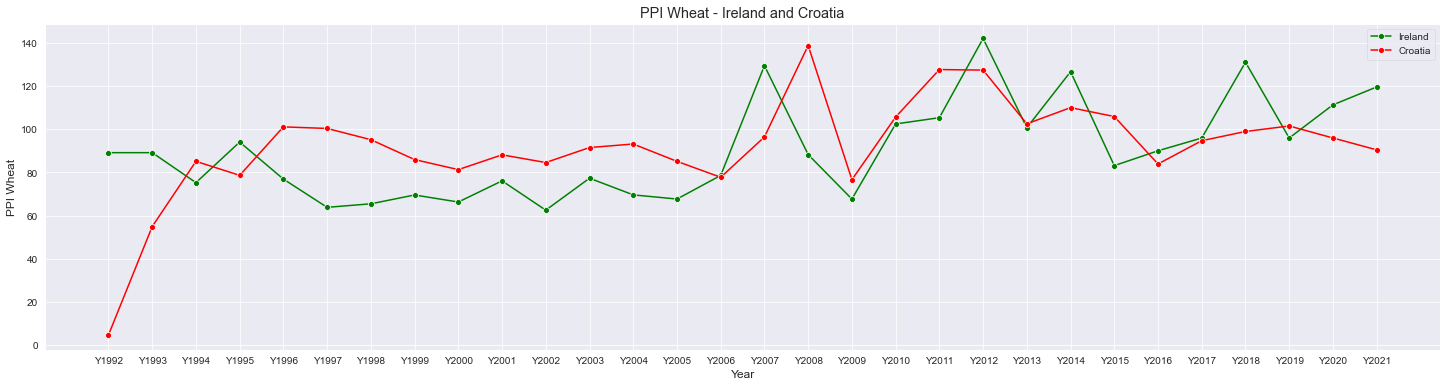

In [220]:
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
p = sns.lineplot(data=df_price_eu_ppi_wh_Ire_Cro_sm_trans, x="Year", y="Ireland", ci=None, color="green", label = "Ireland", marker='o')
p = sns.lineplot(data=df_price_eu_ppi_wh_Ire_Cro_sm_trans, x="Year", y="Croatia", ci=None, color="red", label = "Croatia", marker='o')
p.set_xlabel("Year")
p.set_ylabel("PPI Wheat")
p.set_title("PPI Wheat - Ireland and Croatia") 
p.legend()

In [175]:
# #plot
# # import pandas as pd
# from matplotlib import pyplot as plt

# data = pd.df_Ire_wh_p({"Year":"Value"})
# data.plot(xticks=data.Year)
# plt.show()

In [221]:
# #plot
# # import pandas as pd
# from matplotlib import pyplot as plt

# data = df_price_eu_ppi_wh_Ire_Cro({"Year":"Value"})
# data.plot(xticks=data.Year)
# plt.show()

In [222]:
# test_list = [[2020, 10],[2021, 20],[2022, 30]]

# df_test = pd.DataFrame(test_list, columns =['Year', 'Value'])
# df_test.head()

In [223]:
# # Plot Wheat Production 
# plt.figure(figsize=(25,6))
# sns.set_style("darkgrid")
# sns.lineplot(data=df_test, x="Year", y="Value", ci=None, color="green", marker='o')

In [ ]:
# df_Ire_wh_p.head()

In [ ]:
# # Plot Wheat Yeild 
# plt.figure(figsize=(25,6))
# sns.set_style("darkgrid")
# sns.lineplot(data=df_Ire_wh_y, x="Year", y="Value", ci=None, color="blue", marker='o')

In [ ]:
# # Plot Wheat Area-Harvested  
# plt.figure(figsize=(25,6))
# sns.set_style("darkgrid")
# sns.lineplot(data=df_Ire_wh_h, x="Year", y="Value", ci=None, color="purple", marker='o')

In [ ]:
# #histogram of harvested 
# sns.distplot(df_Ire_wh_h.Value)

In [ ]:
# #histogram of produced  
# sns.distplot(df_Ire_wh_p.Value)

In [233]:


# # plt.subplot(2,3,1)  # if use subplot
# # df = pd.read_csv('documents',low_memory=False)
# df_price_eu_ppi_wh_Ire_Cro_sm_trans['Ireland'].hist()
# plt.title('your title')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ireland PPI Wheat Distribution')

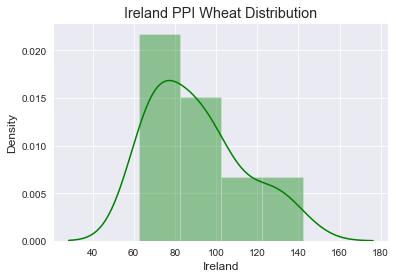

In [238]:
#histogram of PPI Ireland Wheat   
sns.distplot(df_price_eu_ppi_wh_Ire_Cro_sm_trans.Ireland, color = "green")
plt.title("Ireland PPI Wheat Distribution")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Croatia PPI Wheat Distribution')

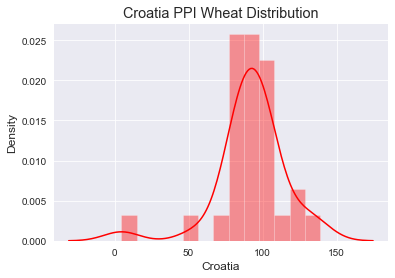

In [239]:
#histogram of PPI C Wheroatiaat   
sns.distplot(df_price_eu_ppi_wh_Ire_Cro_sm_trans.Croatia, color= "red")
plt.title("Croatia PPI Wheat Distribution")

In [240]:
#create df for correlation matrix
df_CA_correl = df_price_eu_ppi_wh_Ire_Cro_sm_trans.drop(['Year'], axis=1)

In [241]:
# correl table 
df_CA_correl.corr()


Area,Croatia,Ireland
Area,,
Croatia,1.000000,0.311628
Ireland,0.311628,1.000000


In [277]:
# # correl matrix
# sns.heatmap(df_CA_correl.corr());

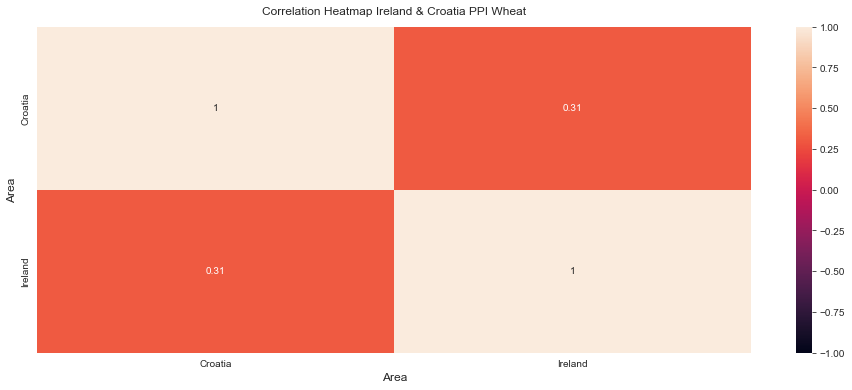

In [278]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_CA_correl.corr(), vmin=-1, vmax=1, annot=True, )
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Ireland & Croatia PPI Wheat', fontdict={'fontsize':12}, pad=12);

In [ ]:
# #find line of best fit
# a, b = np.polyfit(X, y, 1)

# #add points to plot
# plt.scatter(X, y)

# #add line of best fit to plot
# plt.plot(x, a*x+b)

In [ ]:
import matplotlib.pyplot as plt

#plt.plot(df["Rank"], df["P75th"])

# .area()
# .bar()
# .barh()
# .box()
# .hexbin()
# .hist()
# .kde()
# .density()
# .line()
# .pie()
# .scatter()

In [ ]:
# plt.plot(df_CA["Capel_Street_avg"], df_CA["P75th"])
# df_CA.area()
df_farm_eu.plot(subplots=True, figsize=(12, 30)); 

In [ ]:
df_farm_eu.plot(subplots=True, figsize=(8, 8)); 

In [ ]:
# df_farm_eu.boxplot()

<AxesSubplot:title={'center':'Ireland PPI Wheat Boxplot'}>

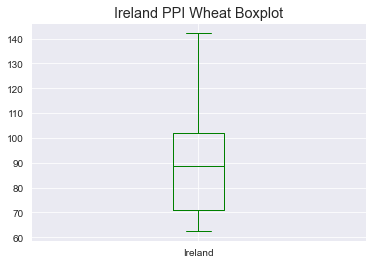

In [248]:
df_price_eu_ppi_wh_Ire_Cro_sm_trans.Ireland.plot.box(title = "Ireland PPI Wheat Boxplot", color = "green")

<AxesSubplot:title={'center':'Croatia PPI Wheat Boxplot'}>

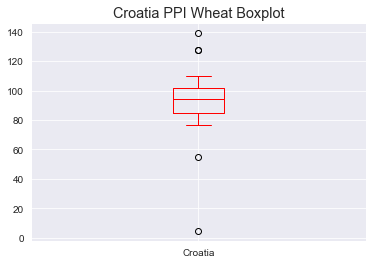

In [249]:
df_price_eu_ppi_wh_Ire_Cro_sm_trans.Croatia.plot.box(title = "Croatia PPI Wheat Boxplot", color = "red")

In [ ]:
# df_farm_eu.maxtp_avg.plot.box(title = "Max Temp")

In [ ]:
#df_farm_eu.rain_avg.plot.box(title = "rain")

Treland vs Croatia PPI Wheat


<AxesSubplot:xlabel='Ireland', ylabel='Croatia'>

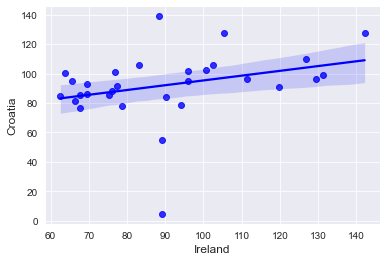

In [272]:
# First, we can use Seaborn’s regplot() function to make scatter plot. And regplot() by default adds regression line with confidence interval. 
# https://datavizpyr.com/how-to-make-scatter-plot-with-regression-line-using-seaborn-in-python/ 

print("Treland vs Croatia PPI Wheat")
sns.regplot(x="Ireland",
            y="Croatia",
            data=df_price_eu_ppi_wh_Ire_Cro_sm_trans, label = "Treland vs Croatia PPI Wheat", color = "blue")

In [ ]:
# Now let's do rain 
sns.regplot(x="rain_avg",
            y="Capel_Street_avg", 
            data=df_farm_eu);

In [ ]:

sns.lmplot(x="maxtp_avg",
           y="Capel_Street_avg", 
           data=df_farm_eu);

In [ ]:
sns.lmplot(x="rain_avg",
           y="Capel_Street_avg", 
           data=df_farm_eu);

In [ ]:
ax=df_farm_eu.plot.scatter(x="maxtp_avg", y="Capel_Street_avg", color="red", marker="*", s=100)

In [ ]:
ax=df_farm_eu.plot.scatter(x="maxtp_avg", y="Capel_Street_avg", color="blue")

In [ ]:
#get shape of data
df_farm_eu.shape

In [ ]:
# Check info of data 
df_farm_eu.info()

# Statistics 

# T-Test, two populations

In [ ]:
# # T-Test, two populations

# # We want to know if, on average, there are differences between the Wheat PPI by Ireland and Croatia. 
# # At a 5% significante level. 

# # Importing the dataset\n",
# # dataset = pd.read_csv('C:/Users/miant/Desktop/Python/trip_advisor_stars.csv')
# # dataset.head(5)


# #We group the data according to the categories requested by the company

# families = dataset.query('Traveler_type == "Families"')['Hotel_stars_given']
# business = dataset.query('Traveler_type == "Business"')['Hotel_stars_given']

# #We perform the test assuming as H0 that mu1 = mu2 (family rate = business rate)
# test = stats.ttest_ind(families, business, 
#                       equal_var=True)

# display(test)

# test = stats.ttest_ind(families, business, 
#                       equal_var=False)

# display(test)



In [387]:
#create df for correlation matrix
cro_ire_year_ppi_df.head()

Area,Croatia,Ireland,Year
Y1992,4.61,89.20,Y1992
Y1993,54.92,89.20,Y1993
Y1994,85.17,75.29,Y1994
Y1995,78.68,94.11,Y1995
Y1996,101.16,76.93,Y1996


In [390]:
cro_ire_year_ppi_df.describe()


Area,Croatia,Ireland
count,30.000000,30.000000
mean,92.185333,90.413667
std,23.429420,22.451664
min,4.610000,62.520000
25%,84.757500,71.030000
50%,93.980000,88.750000
75%,101.475000,102.085000
max,138.910000,142.180000


In [292]:
# # Importing the dataset\n",
# dataset = pd.read_csv('C:/Users/miant/Desktop/Python/trip_advisor_stars.csv')
# dataset.head(5)


In [293]:
#We group the data according to the categories requested by the company

ireland = cro_ire_year_ppi_df['Ireland']
# croatia = cro_ire_year_ppi_df.query('Traveler_type == "Business"')['Hotel_stars_given']
ireland

Y1992     89.20
Y1993     89.20
Y1994     75.29
Y1995     94.11
Y1996     76.93
Y1997     63.83
Y1998     65.47
Y1999     69.56
Y2000     66.29
Y2001     76.11
Y2002     62.52
Y2003     77.34
Y2004     69.61
Y2005     67.68
Y2006     78.63
Y2007    129.55
Y2008     88.30
Y2009     67.68
Y2010    102.52
Y2011    105.42
Y2012    142.18
Y2013    100.78
Y2014    126.75
Y2015     83.18
Y2016     90.07
Y2017     95.99
Y2018    131.16
Y2019     96.00
Y2020    111.38
Y2021    119.68
Name: Ireland, dtype: float64

In [294]:
#We group the data according to the categories requested by the company

croatia = cro_ire_year_ppi_df['Croatia']
# croatia = cro_ire_year_ppi_df.query('Traveler_type == "Business"')['Hotel_stars_given']
croatia

Y1992      4.61
Y1993     54.92
Y1994     85.17
Y1995     78.68
Y1996    101.16
Y1997    100.43
Y1998     95.22
Y1999     85.99
Y2000     81.33
Y2001     88.19
Y2002     84.62
Y2003     91.57
Y2004     93.21
Y2005     85.17
Y2006     77.77
Y2007     96.50
Y2008    138.91
Y2009     76.67
Y2010    105.73
Y2011    127.76
Y2012    127.50
Y2013    102.58
Y2014    110.09
Y2015    105.96
Y2016     83.95
Y2017     94.75
Y2018     99.02
Y2019    101.58
Y2020     96.01
Y2021     90.51
Name: Croatia, dtype: float64

In [ ]:
ireland

In [297]:
# # T-Test, two populations
#We perform the test assuming as H0 that mu1 = mu2 (croatia ppi = Ireland ppi )
test = stats.ttest_ind(ireland, croatia,
                      equal_var=True)

display(test)

Ttest_indResult(statistic=-0.29903730751464225, pvalue=0.7659804713502208)

In [296]:
test = stats.ttest_ind(ireland, croatia, 
                      equal_var=False)

display(test)

Ttest_indResult(statistic=-0.2990373075146422, pvalue=0.7659824066465554)

In [299]:
# Notes on t- test

# “ Because the p-value is less than 0.000, which is less than the significance level of 0.05, the decision is to reject the null hypothesis and conclude that the ratings of the countries are different. “
# Because the p-value is more than 0.05, which is the significance level, the decision is to accept the null hypothesis, therefore we are unable to conclude that the PPI of Wheat in Ireland and Croatia are different. 
# To determine whether the difference between the population means is statistically significant, compare the p-value to the significance level. Usually, a significance level (denoted as α or alpha) of 0.05 works well. A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
# P-value ≤ α: The difference between the means is statistically significantly (Reject H0)
# If the p-value is less than or equal to the significance level, the decision is to reject the null hypothesis. You can conclude that the difference between the population means does not equal the hypothesized difference. If you did not specify a hypothesized difference, Minitab tests whether there is no difference between the means (Hypothesized difference = 0). Use your specialized knowledge to determine whether the difference is practically significant. For more information, go to Statistical and practical significance.
# P-value > α: The difference between the means is not statistically significant (Fail to reject H0)
# If the p-value is greater than the significance level, the decision is to fail to reject the null hypothesis. You do not have enough evidence to conclude that the difference between the population means is statistically significant. You should make sure that your test has enough power to detect a difference that is practically significant. For more information, go to Power and Sample Size for 2-Sample t.


# Statistics 

# Shapiro-Wilk Test  


In [365]:
# https://www.statology.org/normality-test-python/ 
# Check the distribution of my data with stats tests 
# Perform a Shapiro-Wilk Test
# The following code shows how to perform a Shapiro-Wilk for a dataset that follows a log-normal distribution:

import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

# #generate dataset that contains 1000 log-normal distributed values
# lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
shapiro(cro_ire_year_ppi_df.Croatia)

# ShapiroResult(statistic=0.8573324680328369, pvalue=3.880663073872444e-29)

ShapiroResult(statistic=0.8473369479179382, pvalue=0.0005456056678667665)

In [ ]:
# # Hpw to interperate: 
# EXAMPLE: From the output we can see that the test statistic is 0.857 and the 
# corresponding p-value is 3.88e-29 (extremely close to zero).
# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

# POISSON

In [321]:
# However I don't think Poisson is relevent here. Poisson Elements, in a place, in a period of time. 

In [300]:
from scipy.stats import poisson

In [304]:
# Get the average PPI for Ireland
mu = cro_ire_year_ppi_df["Ireland"].mean()
print(mu)

90.41366666666666


In [309]:
#The probability of exactly 3 accidents happening in one day
# Where k thing we're looking for 
# mu = mean

#EXACT NUMBER

poisson.pmf(k = 90.41, mu = 90.41)

0.0

In [313]:
#The probability of exactly 3 accidents happening in one day

#EXACT NUMBER

poisson.pmf(k = 90.41, mu = 90.41)

0.0

In [316]:
#The probability of less than 3 accidents happening in one day

#LESS OR EQUALS

p_1 = poisson.cdf(k = 90.41, mu = 90.41)
print(p_1)

0.510774942762589


In [317]:
#The probability of more than 2 accidents happening in one day

#MORE

p_2 = poisson.sf(k = 90.41, mu = 90.41)
print(p_2)

0.489225057237411


In [319]:
# Check = 100% 
p_1 + p_2

1.0

In [7]:
#The probability of between 2 and 5 accidents inclusive

# poisson.cdf(k = 5, mu = 2) - poisson.cdf(k = 1, mu = 2)

0.5774305418095476

# Normal Distribution 

In [332]:
from scipy.stats import boxcox, shapiro
df = cro_ire_year_ppi_df
df.head()


Area,Croatia,Ireland,Year
Y1992,4.61,89.20,Y1992
Y1993,54.92,89.20,Y1993
Y1994,85.17,75.29,Y1994
Y1995,78.68,94.11,Y1995
Y1996,101.16,76.93,Y1996


In [333]:
# reference: https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/ 
# Check Skewness of Ireland erprate The variables with skewness > 1 are highly positively skewed.
# The variables with skewness < -1 are highly negatively skewed.
# The variables with 0.5 < skewness < 1  are moderately positively skewed.
# The variables with -0.5 < skewness < -1  are moderately negatively skewed.
# And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed 
# # How to int

df.skew()

C:\Users\megan.c.mchugh\AppData\Local\Temp\ipykernel_19880\3479812524.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Area
Croatia   -1.523123
Ireland    0.752542
dtype: float64

In [350]:
# # Want to standardise data so avg = 0 
# df_sd = (df-df.mean())/df.std()
# df_sd.head()

In [349]:
df_sd.Ireland.mean()

5.773159728050814e-16

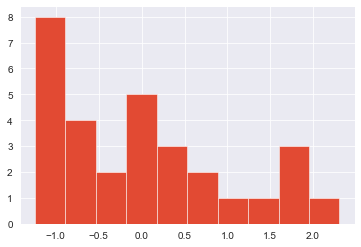

In [348]:
plt.hist(df_sd.Ireland)
plt.show()

In [355]:
# # Importing the library
# import pandas as pd

# # Creating the data frame
# details = {
# 	'Ireland': [1, 3, 5, 7, 9],
# 	'col2': [7, 4, 35, 14, 56]
# }

# # creating a Dataframe object
# df = pd.DataFrame(details)

# Z-Score using pandas
df_sd2 = df['Ireland'] = (df['Ireland'] - df['Ireland'].mean()) / df['Ireland'].std()
df_sd2.head()

Y1992   -0.054057
Y1993   -0.054057
Y1994   -0.673610
Y1995    0.164635
Y1996   -0.600564
Name: Ireland, dtype: float64

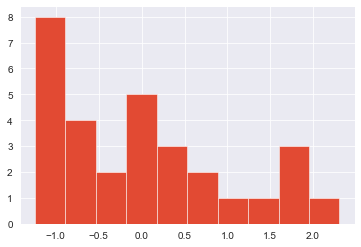

In [357]:
plt.hist(df_sd2)
plt.show()

In [338]:
# df_norm = df.apply(lambda x: boxcox(x)[0])
# print(df_norm)

In [335]:
# NExt 

# BINOMIAL

In [371]:


from scipy.stats import binom


In [ ]:
# The probability of exactly 3, when n=10 and p= 0.20

binom.pmf(k = 3, n = 10, p = 0.20 )

In [ ]:
#The probability of less than 2, when n=10 and p= 0.20

binom.cdf(k = 2, n = 10, p = 0.20)

In [ ]:
# The probability of more than 3, when n=10 and p= 0.20

binom.sf(k = 3, n = 10, p = 0.20)

# Mann Whitney U Test - For non-normal data

In [374]:
# Mann and Whitney’s U-test or Wilcoxon rank-sum test is the non-parametric 
# statistic hypothesis test that is used to analyze the difference between two independent samples of ordinal data. 

In [373]:
# code for Mann-Whitney U test
from scipy.stats import mannwhitneyu
# # Take batch 1 and batch 2 data as per above example
# batch_1 =[3, 4, 2, 6, 2, 5]
# batch_2 =[9, 7, 5, 10, 8, 6]

# perform mann whitney test
stat, p_value = mannwhitneyu(df.Ireland, df.Croatia)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
	print('Reject Null Hypothesis (Significant difference between two samples)')
else:
	print('Do not Reject Null Hypothesis (No significant difference between two samples)')


Statistics=0.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


# Chi-Squared 


In [379]:
## Ecampkle, is there a relationship between  relationship between age and political party. Not relevent here. 

# Could do with EU and price? 

# import pandas as pd
# import scipy.stats as stats

# # create sample data according to survey
# data = [['18-29', 'Conservative'] for i in range(141)] + \
#         [['18-29', 'Socialist'] for i in range(68)] + \
#         [['18-29', 'Other'] for i in range(4)] + \
#         [['30-44', 'Conservative'] for i in range(179)] + \
#         [['30-44', 'Socialist'] for i in range(159)] + \
#         [['30-44', 'Other'] for i in range(7)] + \
#         [['45-65', 'Conservative'] for i in range(220)] + \
#         [['45-65', 'Socialist'] for i in range(216)] + \
#         [['45-65', 'Other'] for i in range(4)] + \
#         [['65 & older', 'Conservative'] for i in range(86)] + \
#         [['65 & older', 'Socialist'] for i in range(101)] + \
#         [['65 & older', 'Other'] for i in range(4)]
# df = pd.DataFrame(data, columns = ['Age Group', 'Political Affiliation']) 

# # create contingency table
# data_crosstab = pd.crosstab(df['Age Group'],
#                             df['Political Affiliation'],
#                            margins=True, margins_name="Total")

# # significance level
# alpha = 0.05

# # Calcualtion of Chisquare
# chi_square = 0
# rows = df['Age Group'].unique()
# columns = df['Political Affiliation'].unique()
# for i in columns:
#     for j in rows:
#         O = data_crosstab[i][j]
#         E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
#         chi_square += (O-E)**2/E

# # The p-value approach
# print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
# p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
# conclusion = "Failed to reject the null hypothesis."
# if p_value <= alpha:
#     conclusion = "Null Hypothesis is rejected."
        
# print("chisquare-score is:", chi_square, " and p value is:", p_value)
# print(conclusion)
    
# # The critical value approach
# print("\n--------------------------------------------------------------------------------------")
# print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
# critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
# conclusion = "Failed to reject the null hypothesis."
# if chi_square > critical_value:
#     conclusion = "Null Hypothesis is rejected."
        
# print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
# print(conclusion)

# Wilcoxon Test 

In [380]:
# Wilcoxon signed-rank test, also known as Wilcoxon matched pair test is a 
# non-parametric hypothesis test that compares the median of two paired groups and 
# tells if they are identically distributed or not. 

In [381]:
# Create data
import scipy.stats as stats

# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(df.Ireland, df.Croatia)


WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)

In [382]:
# eg. Interpretation 
# https://www.statology.org/wilcoxon-signed-rank-test-python/

# In this example, the Wilcoxon Signed-Rank Test uses the following null and alternative hypotheses:

# H0: The mpg is equal between the two groups
# HA: The mpg is not equal between the two groups
# Since the p-value is less than 0.05, we reject the null hypothesis. 
# We have sufficient evidence to say that the true mean  is not equal between the two groups.

# ANOVA or Analysis of Variance Test

In [ ]:

# https://www.reneshbedre.com/blog/anova.html
    
# ANOVA HypothesesPermalink
# Null hypothesis: Groups means are equal (no variation in means of groups)
# H0: μ1=μ2=…=μp
# Alternative hypothesis: At least, one group mean is different from other groups
# H1: All μ are not equal

In [398]:
# import pandas as pd
# # # load data file
# # df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# # # reshape the d dataframe suitable for statsmodels package 
# # df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# # # replace column names
# # df_melt.columns = ['index', 'treatments', 'value']

# # # generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# # # easily detect the differences between different treatments
# import matplotlib.pyplot as plt
# import seaborn as sns



In [404]:
df.head()

Area,Croatia,Ireland,Year
Y1992,4.61,-0.054057,Y1992
Y1993,54.92,-0.054057,Y1993
Y1994,85.17,-0.673610,Y1994
Y1995,78.68,0.164635,Y1995
Y1996,101.16,-0.600564,Y1996


In [406]:
import pandas as pd
# load data file

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Ireland', 'Croatia', 'Year'])


In [412]:
# replace column names
df_melt.columns = ['index', 'Ireland', 'Croatia']



In [408]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns


In [414]:
# ax = sns.boxplot(x='Ireland', y='value', data=df_melt, color='green')
# ax = sns.swarmplot(x="Croatia", y="value", data=df_melt, color='red')
# plt.show()

In [421]:
# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 
# The test is applied to samples from two or more groups, possibly with differing sizes.

In [423]:
# # The null hypothesis (H0) is that there is no difference between the groups and 
# equality between means (walruses weigh the same in different months). 
# The alternative hypothesis (H1) is that there is a difference between the means and groups 
# (walruses have different weights in different months) 

In [415]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['Ireland'], df['Croatia'])
print(fvalue, pvalue)



463.58716072515034 2.3987378561643514e-29


In [422]:
# Usually, if a p value is .10 or less, we can reject the null hypothesis. ANOVA tables are sometimes produced with p values. The lower the p value is for a given ratio, the more reliably we can reject the null hypothesis that a particular source or model or parameter is not significant.  

In [416]:

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [420]:

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(Ireland)', data=df).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table


PatsyError: Error evaluating factor: NameError: name 'Ireland' is not defined
    value ~ C(Ireland)
            ^^^^^^^^^^

In [ ]:
# output (ANOVA F and p value)
                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN



In [ ]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary


In [ ]:
# output (ANOVA F and p value)
                 df   sum_sq   mean_sq         F    PR(>F)
C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

In [ ]:

# Print the result
print(result)

# Descion Tree

In [428]:
# Q: can we predict if a country is a member of the EU based on their wheat PPI? 

# Decsion Tree 3

In [457]:
 # Import rewuirement 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree

import matplotlib as plt
from matplotlib import pyplot
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [458]:
 # Import rewuirement 
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  


# from pycaret.classification import *

In [459]:
 # Import rewuirement 
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [528]:
# Import Dataset - already processed
df_all_gdp_ppi_final = pd.read_csv("DATAOUTPUTS/df_all_gdp_ppi_final.csv")
df_all_gdp_ppi_final.head()

,LOCATION,Area,eu_member,GDP,wheat_PPI,TIME,YEAR,YEAR_INT
0,AUT,Austria,1,29380.031110,85.69,2000,Y2000,2000
1,AUT,Austria,1,29707.462264,82.98,2001,Y2001,2001
2,AUT,Austria,1,31178.051444,75.97,2002,Y2002,2002
3,AUT,Austria,1,32158.225907,83.72,2003,Y2003,2003
4,AUT,Austria,1,33784.432645,68.22,2004,Y2004,2004


In [463]:
# df_all_gdp_ppi_final.info()

In [ ]:
######### NA here 

# convert the 'Date' column to datetime format
# df_CA_p['wc_m']= pd.to_datetime(df_CA_p['wc_m'], format='%d/%m/%Y')
 
# # Check the format of 'Date' column
# df_CA_p.info()

In [462]:
# set x 
X = df_all_gdp_ppi_final.drop(columns = ['LOCATION', 'Area', 'GDP', 'TIME', 'YEAR', 'YEAR_INT', 'eu_member'])
print(X)

     wheat_PPI
0        85.69
1        82.98
2        75.97
3        83.72
4        68.22
..         ...
677      91.55
678      95.77
679     102.82
680     111.27
681     119.72

[682 rows x 1 columns]


In [478]:
# set y
y = df_all_gdp_ppi_final['eu_member']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
677    1
678    1
679    1
680    1
681    1
Name: eu_member, Length: 682, dtype: int64


In [483]:
# split into train and test sets 
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

# https://github.com/davidsbatista/text-classification/issues/1 

# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
# print(x_train.shape)
# print(x_test.shape)

(511, 1)
(171, 1)


In [484]:
# from sklearn import preprocessing
# from sklearn import utils

# #convert y values to categorical values
# lab = preprocessing.LabelEncoder()
# x_transformed = lab.fit_transform(X)

# #view transformed values
# print(x_transformed)

In [485]:
#  First we will fit a normal decision tree without any fine tuning and check the results 
## Then I reran this with a max_depth = 3

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

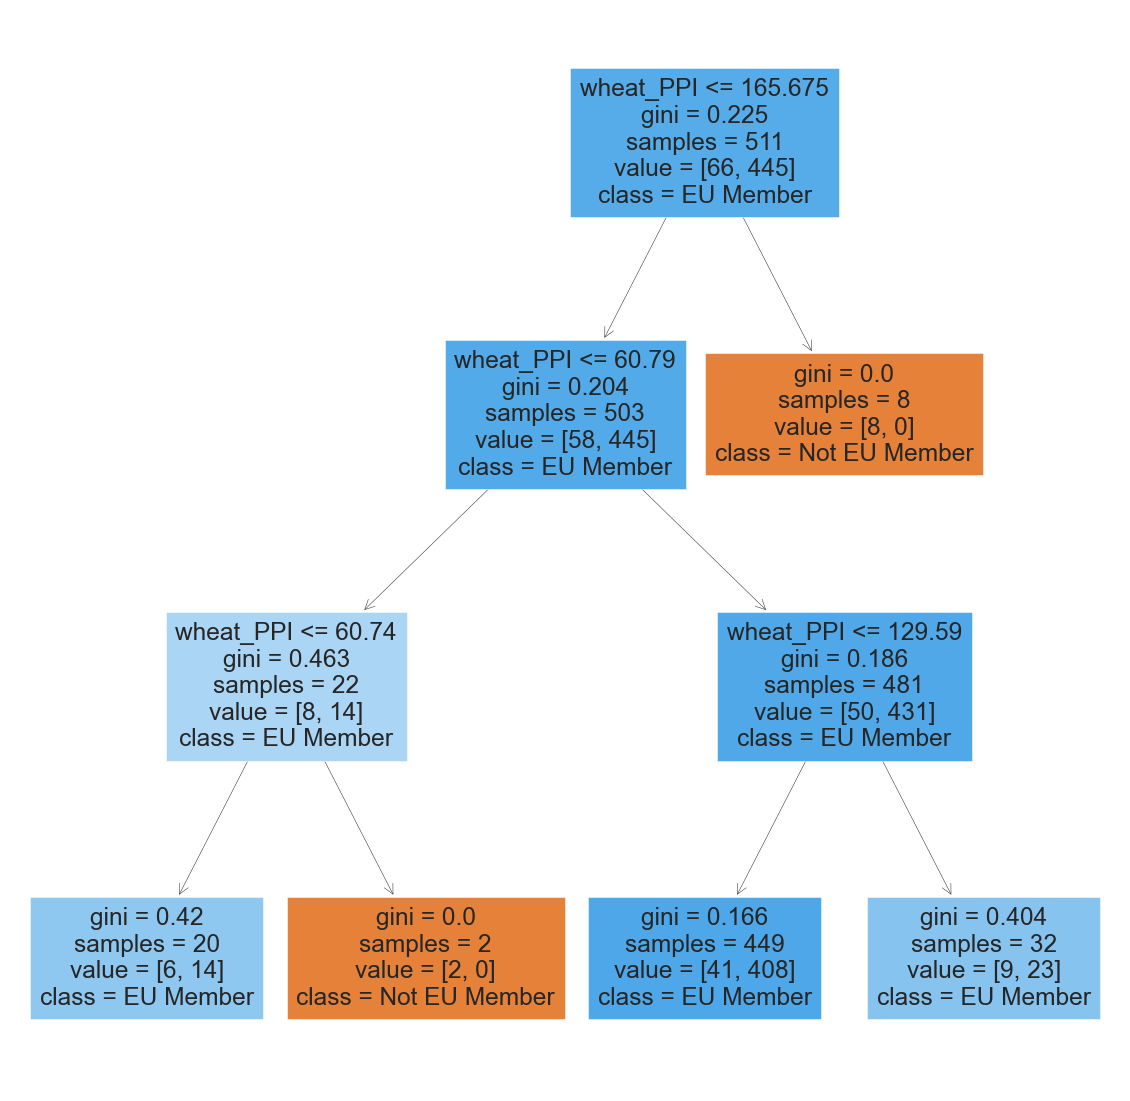

In [494]:
# Plot tree
plt.figure(figsize=(20,20))
features = X.columns
classes = ['Not EU Member','EU Member']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [495]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Accuracy Train score 0.8904109589041096
Accuracy Test score 0.8947368421052632
Train Confusion matrix


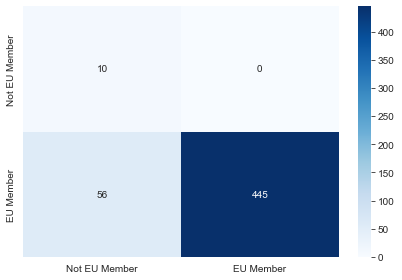

Test Confusion matrix


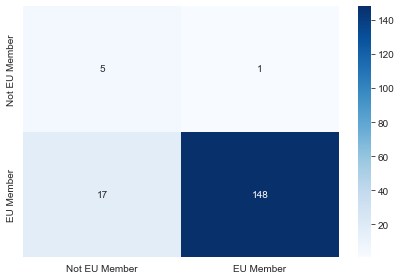

In [496]:
# Get and print results
print(f'Accuracy Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Accuracy Test score {accuracy_score(y_test_pred,y_test)}')
# print(f'Recall score {recall_score(y_train_pred,y_train)}')
# print(f'Recall score {recall_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# GridSearchCV

In [514]:
# https://www.mygreatlearning.com/blog/gridsearchcv/#:~:text=GridSearchCV%20is%20a%20technique%20for,parameter%20values%2C%20predictions%20are%20made.

#import all necessary libraries
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
 


In [506]:
#load the dataset and split it into training and testing sets
dataset = load_breast_cancer()
X=dataset.data
Y=dataset.target
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 


In [507]:
# train the model on train set without using GridSearchCV 
model = SVC() 
model.fit(X_train, y_train) 
   


SVC()

In [508]:
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [509]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   


In [510]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   


In [511]:
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']},
             verbose=3)

In [512]:
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   


{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [513]:
# print classification report 
print(classification_report(y_test, grid_predictions)) 


              precision    recall  f1-score   support

           0       0.95      0.89      0.92        66
           1       0.94      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



# K-Means Clustering 

In [499]:
# https://www.askpython.com/python/examples/cluster-analysis-in-python

from copy import deepcopy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [529]:
df_all_gdp_ppi_final.head()

,LOCATION,Area,eu_member,GDP,wheat_PPI,TIME,YEAR,YEAR_INT
0,AUT,Austria,1,29380.031110,85.69,2000,Y2000,2000
1,AUT,Austria,1,29707.462264,82.98,2001,Y2001,2001
2,AUT,Austria,1,31178.051444,75.97,2002,Y2002,2002
3,AUT,Austria,1,32158.225907,83.72,2003,Y2003,2003
4,AUT,Austria,1,33784.432645,68.22,2004,Y2004,2004


In [591]:
df_all_gdp_ppi_final_clean = df_all_gdp_ppi_final.drop(columns = ['LOCATION', 'Area', 'TIME', 'YEAR', 'YEAR_INT'])
df_all_gdp_ppi_final_clean.tail()

,eu_member,GDP,wheat_PPI
677,1,27135.977062,91.55
678,1,29337.903177,95.77
679,1,32909.566163,102.82
680,1,33080.128126,111.27
681,1,35946.765464,119.72


In [589]:
df_all_gdp_ppi_final_clean_na = df_all_gdp_ppi_final_clean.eu_member.fillna(0)

In [592]:
# Print Unique
print(df_all_gdp_ppi_final_clean['eu_member'].unique())

[1 0]


In [598]:
# # importing libraries
# import pandas as pd
# import numpy as np


# num = {'Integers': [10, 15, 30, 40, 55, np.nan,
# 					75, np.nan, 90, 150, np.nan]}

# # Create the dataframe
# df = pd.DataFrame(num, columns=['Integers'])

# Applying the method
check_nan = df_all_gdp_ppi_final_clean['eu_member'].isnull().values.any()

# printing the result
print(check_nan)


False


In [560]:
df_all_gdp_ppi_final_clean_KM = df_all_gdp_ppi_final_clean.apply(lambda col: pd.Series(col.unique()))

In [567]:
df_all_gdp_ppi_final_clean_KM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eu_member  2 non-null      float64
 1   GDP        682 non-null    float64
 2   wheat_PPI  650 non-null    float64
dtypes: float64(3)
memory usage: 16.1 KB


In [577]:
data = df_all_gdp_ppi_final_clean_KM.drop(columns = ['eu_member'])
data.head(30)
#data.info()

,GDP,wheat_PPI
0,29380.031110,85.69
1,29707.462264,82.98
2,31178.051444,75.97
3,32158.225907,83.72
4,33784.432645,68.22
5,35024.557484,63.57
6,37659.840674,81.40
7,39436.420128,146.51
8,41316.022642,104.65
9,40929.336746,70.54


In [578]:
category = df_all_gdp_ppi_final_clean_KM.drop(columns = ['GDP', 'wheat_PPI'])
category.head(30)
#category.info()

,eu_member
0,1.0
1,0.0
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [599]:
df_all_gdp_ppi_final_clean_KM2= df_all_gdp_ppi_final_clean_KM.dropna()
df_all_gdp_ppi_final_clean_KM2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eu_member  2 non-null      float64
 1   GDP        2 non-null      float64
 2   wheat_PPI  2 non-null      float64
dtypes: float64(3)
memory usage: 64.0 bytes


In [600]:
data = df_all_gdp_ppi_final_clean_KM2.drop(columns = ['eu_member'])
data.head(30)
#data.info()

,GDP,wheat_PPI
0,29380.031110,85.69
1,29707.462264,82.98


In [601]:
category = df_all_gdp_ppi_final_clean_KM2.drop(columns = ['GDP', 'wheat_PPI'])
category.head(30)
#category.info()

,eu_member
0,1.0
1,0.0


In [603]:
k = 2

In [604]:
# Training data
n = data.shape[0]
 


In [607]:
# Number of features in the data
c = data.shape[2]
 


IndexError: tuple index out of range

In [608]:
# Generating random centers
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean


ValueError: Data must be 1-dimensional

In [609]:
 
# Plotting data 
colors=['blue', 'yellow', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='.', c='r', s=150)


KeyError: (0, 0)

## K means v 2

In [ ]:
# import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# %matplotlib inline

# blobs = pd.read_csv('kmeans_blobs.csv')
# colnames = list(blobs.columns[1:-1])
# blobs.head()

In [ ]:
# customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

# fig, ax = plt.subplots(figsize=(8, 6))
# plt.scatter(x=blobs['x'], y=blobs['y'], s=150,
#             c=blobs['cluster'].astype('category'), 
#             cmap = customcmap)
# ax.set_xlabel(r'x', fontsize=14)
# ax.set_ylabel(r'y', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [611]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3


In [613]:
# df = blobs[['x','y']]
df_km = [df_all_gdp_ppi_final_clean.GDP], [df_all_gdp_ppi_final_clean.wheat_PPI]



In [615]:
centroids = initiate_centroids(k, df_km)
centroids

AttributeError: 'tuple' object has no attribute 'sample'

## Archived Code


In [439]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [429]:
# # Load libraries
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# set x 
# X = df_all_gdp_ppi_final.drop(columns = ['wc_m', 'Capel_Street_avg', 'wdsp_avg', 'sun_avg', 'ff_annual_avg', 'Is_busy'])
# print(X)

# X = df_all_gdp_ppi_final.wheat_PPI
# print(X)

# X = df_farm_eu['rain_avg', 'maxtp_avg']

# X = df_farm_eu.rain_avg

# y = df_farm_eu['Is_busier_than_usual']

# #Descion tree: ass DecisionTreeClassifier as earlier. 
# model = DecisionTreeClassifier()
# model.fit(X,y)

# # # This time add the train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # # note for above, the test size is 20%, i.e.e 80% is for training the model. If you decrease the amount of data for training 
# # # (i.e.e increase test_size to say, 0.8, the accuracy figure gets a lot worse.)

# # # this is asking what the music would be for a 21 yea old male and a 22 YO female. 
# predictions = model.predict( [ [21,1], [22,0] ] ) 
# predictions

# # model = DecisionTreeClassifier()
# # model.fit(X_train, y_train)
# # predictions = model.predict(X_test)
# # predictions

# # score = accuracy_score(y_test, predictions)
# # score

In [443]:
df_all_gdp_ppi_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   682 non-null    object 
 1   Area       682 non-null    object 
 2   eu_member  682 non-null    int64  
 3   GDP        682 non-null    float64
 4   wheat_PPI  682 non-null    float64
 5   TIME       682 non-null    int64  
 6   YEAR       682 non-null    object 
 7   YEAR_INT   682 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 42.8+ KB


In [ ]:
# from sklearn import tree
# # >>> X = [[0, 0], [1, 1]]
# # >>> Y = [0, 1]
# >>> clf = tree.DecisionTreeClassifier()
# >>> clf = clf.fit(X, Y)

In [448]:
X = df_all_gdp_ppi_final[['wheat_PPI']]
print(X)

     wheat_PPI
0        85.69
1        82.98
2        75.97
3        83.72
4        68.22
..         ...
677      91.55
678      95.77
679     102.82
680     111.27
681     119.72

[682 rows x 1 columns]


In [449]:
# set y
y = df_all_gdp_ppi_final[['eu_member']]
print(y)

     eu_member
0            1
1            1
2            1
3            1
4            1
..         ...
677          1
678          1
679          1
680          1
681          1

[682 rows x 1 columns]


In [450]:
print (X, y)

     wheat_PPI
0        85.69
1        82.98
2        75.97
3        83.72
4        68.22
..         ...
677      91.55
678      95.77
679     102.82
680     111.27
681     119.72

[682 rows x 1 columns]      eu_member
0            1
1            1
2            1
3            1
4            1
..         ...
677          1
678          1
679          1
680          1
681          1

[682 rows x 1 columns]


In [451]:
#Descion tree: ass DecisionTreeClassifier as earlier. 
#model = DecisionTreeClassifier(max_depth = 3)
model = DecisionTreeClassifier()
model.fit(X,y)





DecisionTreeClassifier()

In [452]:

# # This time add the train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # note for above, the test size is 20%, i.e.e 80% is for training the model. If you decrease the amount of data for training 
# # (i.e.e increase test_size to say, 0.8, the accuracy figure gets a lot worse.)



In [453]:
# # this is asking is it busier than usual for [maxtp, rain]
# Outputs example = is businer than usual, 1 = True, busier than usual. If 0, = False, not busier than usual. 
# # Outputs = is EU, 1 = True, is EU. If 0, = False, not EU. 
predictions = model.predict( [ [12,0] ] ) 
print(predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 1 features as input.

In [ ]:
# # df_DT= df_farm_eu['maxtp_avg', 'rain_avg', 'Is_busy']
# # print(df_DT)
# print(df_farm_eu)

In [454]:

# model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

score = accuracy_score(y_test, predictions)
score

0.7883211678832117

In [ ]:
# Model persistance. You want to save the model to run with more data in future. 
# You don;t have to retrain model. It's already trained - like an intelligent person. 
# the below will save the model as 'music-recommender.joblib'
joblib.dump(model, 'CapelSt_busy.joblib')

# Mosh goes back and changes the above to 
model = joblib.load('CapelSt_busy.joblib')

# # Let's see if the model is behaving correctly 
predictions = model.predict([[25,1]])
predictions

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
y_pred_train
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

In [447]:
#Try again

In [444]:
from sklearn import tree



In [445]:
clf = tree.DecisionTreeClassifier()


In [446]:
clf = clf.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 85.69  82.98  75.97  83.72  68.22  63.57  81.4  146.51 104.65  70.54
 142.64 121.71 163.57 114.73 104.65 106.2   89.15 112.4  119.38 113.18
 107.75 102.33  73.31  71.98  65.62  74.23  72.91  60.98  80.73 118.58
 113.41  73.24 103.27 131.47 148.   131.71 109.25 102.34  88.41  93.7
 110.42 103.35 115.65 119.2   60.37  69.25  79.46  75.91  67.92  52.82
  54.16  85.19 129.74  97.14  80.97 104.1  112.62 115.6   94.41 103.01
 102.58 104.1  109.13 106.1  108.28 110.2   80.1   92.6   80.03  79.46
  91.82  64.7   72.96  99.1  112.97  64.61  74.66 110.23 113.76 120.31
 117.58  97.21  85.21  87.98  94.2  100.28  96.53 101.03  77.55  77.12
  68.13  69.7   82.18  65.86  71.45 107.91 132.07  79.03  85.84 126.05
 134.52 133.38 108.17 100.23  91.6   97.09 109.57 116.98 108.17 119.08
  82.48  81.04  80.82  77.14  73.47  64.9   67.96  97.96 115.71  80.82
  90.   120.61 124.29 124.9  104.08 103.47  92.45  97.35 122.45 112.65
 104.69 116.94  65.84  69.97  63.05  74.12  62.41  60.53  78.72 122.61
  93.93  72.42 120.43 125.14 143.69 119.17 105.47 100.92  93.61  90.57
 106.93 106.02 113.61 121.19  73.81  70.89  64.33  70.06  78.98  63.06
  70.7  111.46 118.47  71.97  95.54 131.85 139.49 129.3  107.64 103.18
  89.17  96.18 107.26 106.31 109.61 124.2   60.23  67.35  64.49  64.59
  63.85  63.76  64.63 107.53 108.59  76.14  73.11 101.27 107.   100.54
 107.33 106.3   86.37  88.77  85.98  91.41 101.36  98.4   60.83  50.21
  49.96  66.15  51.29  44.8   57.63  95.79  87.8   65.41  85.93 112.05
 132.32 104.57 105.96 106.54  87.5   95.58 107.24 111.09 120.01 127.92
  66.29  76.11  62.52  77.34  69.61  67.68  78.63 129.55  88.3   67.68
 102.52 105.42 142.18 100.78 126.75  83.18  90.07  95.99 131.16  96.
 111.38 119.68  75.18  84.31  80.74  81.61  79.64  62.94  74.36 116.44
 144.36  87.6   86.12 124.55 122.82 120.32 121.09  93.41  85.5   90.06
  99.79 104.26 113.33 120.56 550.54 544.07 535.13 518.79 486.71 491.26
 505.03 261.18 265.89 290.73 239.02 166.31 116.41 104.19 102.32 111.15
  86.53 105.67 137.8  134.73 142.3  182.22  87.55  90.89  84.21  89.55
  78.93  77.06  84.41 135.87  98.57  67.03 106.26 121.3  154.24 112.01
  99.84 104.25  95.9  100.25 119.83 105.73 114.81 117.62  69.94  71.71
  63.47  76.42  71.89  62.82  78.05 122.   104.24  71.6  104.08 125.26
 145.08 126.17 102.35 102.92  94.72  99.78 117.25 109.61 117.57 122.15
  77.2   76.75  66.26  69.15  71.73  55.78  68.09 107.45  97.57  73.4
  91.03 124.77 136.02 121.12 103.95 101.67  94.38 101.06 110.33 109.88
 113.83 120.52  55.22  67.11  60.78  60.67  67.84  71.26  64.98 109.
 137.6  118.34  86.   104.53 123.53 111.54 101.83 104.74  93.43  96.44
  98.3  109.26 106.25 108.48  94.16 104.82 101.57  98.82 101.91  85.93
  89.41 125.46 130.49  79.53 102.14 135.98 141.9  120.49 107.26 105.52
  87.21  99.84 107.6  109.3  105.19 101.09  66.97  75.84  69.08  71.15
  73.21  72.18  71.82 108.42 112.85  82.64  89.96 118.63 127.81 110.02
 108.11 104.35  87.54  95.43  94.91  98.52  99.97 101.46  70.22  74.69
  70.22  73.54  70.07  65.64  74.58 125.12 129.18  82.27 116.91 129.9
 137.12 121.96 105.36 101.9   92.74  93.24 133.8  107.46 112.73 117.99
  56.25  60.75  52.5   63.    64.5   54.75  60.75  96.75 114.    87.
  99.   137.25 144.75 139.5  117.    93.    90.   107.72 122.01 116.98
 129.63 140.19  53.04  56.35  72.38  69.06  69.06  69.61  86.74 131.49
 137.57  98.9  115.47 146.96 158.01 139.23 121.55  99.45  79.01  95.58
 104.42  92.27 101.66 107.2   66.51  64.75  67.03  70.5   71.33  63.96
  86.3  137.05  72.83  72.26 125.94 114.18 156.36 118.05 105.34 100.59
  94.07  95.79 112.95 100.82 109.36 110.96  82.72  75.76  81.96  87.15
  75.5   67.45  69.44 108.81 113.58  75.96  86.4  122.94 124.53 115.24
 107.66 107.15  85.19  98.05 101.49 103.9   94.35  85.96  59.45  57.5
  58.47  61.4   66.27  60.42  76.02 128.64 106.23  77.97 113.05 135.47
 145.21 125.72 106.16 101.37  92.47 101.37 117.81 111.64 116.68 136.99
  77.44  78.18  75.57  74.82  67.71  61.16  82.97 128.29 121.35  74.87
 104.63 133.07 137.07 115.84 101.6  104.75  93.64 100.04 110.89 105.33
 109.08 116.43  65.44  70.47  54.37  69.13  79.54  51.68  60.41 100.01
 105.04  70.47  81.88 109.74 135.58 105.71 105.38 102.34  92.29 100.95
 102.25  99.84 110.01 116.45  81.33  88.19  84.62  91.57  93.21  85.17
  77.77  96.5  138.91  76.67 105.73 127.76 127.5  102.58 110.09 105.96
  83.95  94.75  99.02 101.58  96.01  90.51  91.53  90.9   95.92  91.53
  63.95  60.81  63.32  68.96 165.04 136.43  63.45  97.56  93.15  89.49
  94.62  90.95 114.43  79.95  95.46  84.13  90.26  94.19  47.63  72.27
  73.26  71.94  60.73  63.    69.8   92.73  73.27  86.87  74.72  72.2
  88.7   95.3   82.   106.18 111.81 103.42 101.01 101.48 100.82 100.15
  47.12  59.42  53.58  92.81  77.89  50.7   47.89  85.92  92.96  66.2
  83.1  123.94 128.17 119.72 107.04 104.23  88.73  91.55  95.77 102.82
 111.27 119.72].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

In [ ]:
bb

In [ ]:
# Combined for outputs
print("Confusion Maxtrix")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Not Busy', 'Busy']))


In [ ]:
################################ Check out for confusion matric and viz ###############
## https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial 
# Note: class_names : list of strings, bool or None, optional (default=None)
   # Names of each of the target classes in ascending numerical order.
   # Only relevant for classification and not supported for multi-output.
   # If ``True``, shows a symbolic representation of the class name.


plt.figure(figsize=(20,20))
features = X.columns
classes = ['Not Busy','Busy']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Busy', 'Busy']); ax.yaxis.set_ticklabels(['Busy', 'Not Busy']);


## ARCHIVED CODE: 

In [ ]:
# ML with Mosh example
 
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier
# # from sklearn.externals import joblib # this is what Most said, but it dosn't work and Google said to use below instead. 
# import joblib
# from sklearn import tree


# # import data
# music_data = pd.read_csv('music.csv') 
# X = music_data.drop(columns = ['genre'])
# y = music_data['genre']

# # #Create a model 
# model = DecisionTreeClassifier()

# # Train the model
# model.fit(X,y)

# tree.export_graphviz(model, out_file ='music.recommender.dot', 
#                      feature_names=['age', 'gender'],
#                      class_names=sorted(y.unique()),
#                      label='all',
#                      rounded = True, 
#                      filled =True)

# ## To visualise this. 
# # 1. Open VSCode (another application) and 
# # 2. Drop in the new file 'music.recommender.dot', 
# # 3. in VSCode, go to extentions and search for dot, install the dot extention from Stehpen. 
# # 4. On the top of the VS code windw is an ico with 3 dots (like more ...) click this, then click, 'open preview to the slide'
# # This will open up the visulisation of the decision tree. The more column you have, the more complicated it is. 

In [ ]:
# Vis # From Mosh, but I can't get it work
# ## To visualise this. 
# # 1. Open VSCode (another application) and 
# # 2. Drop in the new file 'music.recommender.dot', 
# # 3. in VSCode, go to extentions and search for dot, install the dot extention from Stehpen. 
# # 4. On the top of the VS code windw is an ico with 3 dots (like more ...) click this, then click, 'open preview to the slide'
# # This will open up the visulisation of the decision tree. The more column you have, the more complicated it is. 

# tree.export_graphviz(model, out_file ='capelSt.busy.dot', 
#                      feature_names=['maxtp', 'rain'],
#                      class_names=sorted(y.unique()),
#                      label='all',
#                      rounded = True, 
#                      filled =True)

# ## To visualise this. 
# # 1. Open VSCode (another application) and 
# # 2. Drop in the new file 'music.recommender.dot', 
# # 3. in VSCode, go to extentions and search for dot, install the dot extention from Stehpen. 
# # 4. On the top of the VS code windw is an ico with 3 dots (like more ...) click this, then click, 'open preview to the slide'
# # This will open up the visulisation of the decision tree. The more column you have, the more complicated it is. 

In [ ]:
# from sklearn.externals.six import StringIO  

# from six import StringIO
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()




# # export_graphviz(clf, out_file=dot_data,  
# #                 filled=True, rounded=True,
# #                 special_characters=True, feature_names = feature_cols,class_names=['0','1'])
# # graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# # graph.write_png('diabetes.png')
# # Image(graph.create_png())


In [ ]:
tree.plot_tree(model);

In [ ]:
## https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
# y_pred = classifier.predict(X_test)
# #Accuracy
# from sklearn import metrics 
# print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 3)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
################################ Check out for confusion matric and viz ###############
## https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial 
# Note: class_names : list of strings, bool or None, optional (default=None)
   # Names of each of the target classes in ascending numerical order.
   # Only relevant for classification and not supported for multi-output.
   # If ``True``, shows a symbolic representation of the class name.


plt.figure(figsize=(20,20))
features = X.columns
classes = ['Not Busy','Busy']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
# from keras.models import load_model

classifier = model

In [ ]:
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)


In [ ]:
# #importing accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

In [ ]:
# cm_list=cm.tolist()
# cm_list[0].insert(0,'Real True')
# cm_list[1].insert(0,'Real False')
# print tabulate(cm_list,headers=['Real/Pred','Pred True', 'Pred False'])

In [ ]:
# print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))



In [ ]:
# print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))


In [ ]:

# print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
# from sklearn.metrics import classification_report
# print('\nClassification Report\n')
# print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))

In [ ]:
# # Combined for outputs
# print("Confusion Maxtrix")
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# #importing accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

# print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

# print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# from sklearn.metrics import classification_report
# print('\nClassification Report\n')
# print(classification_report(y_test, y_pred, target_names=['Not Busy', 'Busy']))


In [ ]:
# # helper function
# def plot_confusionmatrix(y_train_pred,y_train,dom):
#     print(f'{dom} Confusion matrix')
#     cf = confusion_matrix(y_train_pred,y_train)
#     sns.heatmap(cf,annot=True,yticklabels=classes
#                ,xticklabels=classes,cmap='Blues', fmt='g')
#     plt.tight_layout()
#     plt.show()

In [ ]:
# print(f'Train score {accuracy_score(y_train_pred,y_train)}')
# print(f'Test score {accuracy_score(y_test_pred,y_test)}')
# plot_confusionmatrix(y_train_pred,y_train,dom='Train')
# plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score
#model_train_mse = mean_squared_error(y_train, y_model_train_pred)
#model_train_r2 = r2_score(y_train, y_model_train_pred)
#model_test_mse = mean_squared_error(y_test, y_model_test_pred)
##model_test_r2 = r2_score(y_test, y_model_test_pred)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Busy', 'Busy']); ax.yaxis.set_ticklabels(['Busy', 'Not Busy']);


In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['business', 'health']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
# from sklearn.datasets import load_breast_cancer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# from sklearn import tree

In [ ]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())


In [ ]:
# fn=['maxtp','rain']
# cn=['1', '0']fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)tree.plot_tree(model,
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);fig.savefig('capelst.png')

In [ ]:
# tree.export_graphviz(model,
#                      out_file="tree.dot",
#                      feature_names = X
#                      class_names= y,
#                      filled = True)

# Try wtih max depth (i.e. Pruning)

In [ ]:

  #  https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

In [ ]:
# as belfore with pruning

In [ ]:
#Descion tree: ass DecisionTreeClassifier as earlier. 
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X,y)



In [ ]:

# # This time add the train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:

# # note for above, the test size is 20%, i.e.e 80% is for training the model. If you decrease the amount of data for training 
# # (i.e.e increase test_size to say, 0.8, the accuracy figure gets a lot worse.)
#






In [ ]:

# # this is asking is it busier than usual for [maxtp, rain]
# Outputs = is businer than usual, 1 = True, busier than usual. If 0, = False, not busier than usual. 
predictions = model.predict( [ [12,0] ] ) 
print(predictions)


In [ ]:

#

# model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

score = accuracy_score(y_test, predictions)
score


In [ ]:

#
# Model persistance. You want to save the model to run with more data in future. 
# You don;t have to retrain model. It's already trained - like an intelligent person. 
# the below will save the model as 'music-recommender.joblib'
joblib.dump(model, 'CapelSt_busy.joblib')


In [ ]:

# Mosh goes back and changes the above to 
model = joblib.load('CapelSt_busy.joblib')


In [ ]:

# # Let's see if the model is behaving correctly 
predictions = model.predict([[25,1]])
predictions

#

In [ ]:


tree.plot_tree(model);

#

In [ ]:
print(y)

In [ ]:


################################ Check out for confusion matric and viz ###############
## https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial 
# Note: class_names : list of strings, bool or None, optional (default=None)
   # Names of each of the target classes in ascending numerical order.
   # Only relevant for classification and not supported for multi-output.
   # If ``True``, shows a symbolic representation of the class name.

plt.figure(figsize=(20,20))
features = df_farm_eu.columns
classes = ['Not Busy','Busy']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

### Part 2: Machine Learning 2 

# Based on: # Based on: https://www.datacamp.com/tutorial/tutorial-time-series-forecasting 

In [ ]:
# sample  

## extract month and year from dates
# df_farm_eu2 = df_farm_eu['Month'] = [i.month for i in df_farm_eu['Date']]
# df_farm_eu2 = df_farm_eu['Year'] = [i.year for i in df_farm_eu['Date']]

# # create a sequence of numbers
# data['Series'] = np.arange(1,len(data)+1)

# # drop unnecessary columns and re-arrange
# data.drop(['Date', 'MA12'], axis=1, inplace=True)
# data = data[['Series', 'Year', 'Month', 'Passengers']]

# # check the head of the dataset
# data.head()

In [ ]:
df_farm_eu.describe()

In [ ]:

# # extract month and year from dates
# df_farm_eu['Month'] = [i.month for i in df_farm_eu['Date']]
# df_farm_eu['Year'] = [i.year for i in df_farm_eu['Date']]

# # # create a sequence of numbers
# df_farm_eu['Series'] = np.arange(1,len(df_farm_eu)+1)

# # # drop unnecessary columns and re-arrange
# df_farm_eu.drop(['Date', 'Capel_Street_avg','Is_busier_than_usual','Date', 'IN', 'OUT'], axis=1, inplace=True)
# df_farm_eu_trimmed = df_farm_eu[['Series', 'Capel_Street_avg', 'Year', 'Month', 'maxtp', 'mintp', 'rain', 'wdsp', 'sun']]

# # # check the head of the dataset
# df_farm_eu_trimmed.head()


In [ ]:
# # install pycaret
# # pip install pycaret

# pip install


In [ ]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

In [ ]:
# from sktime.datasets import load_airline
# from sktime.utils.plotting import plot_series

In [ ]:


# # plotting for visualization
# plot_series(y)


## New approach: https://www.kaggle.com/code/tuannguyenvananh/traffic-prediction-and-some-analysis/notebook 

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [ ]:


# Don't need this as I alreay have my data frame
# df = pd.read_csv('../input/traffic-prediction-dataset/traffic.csv', parse_dates=True, index_col='DateTime')

df_farm_eu2 = pd.read_csv('df_farm_eu2.csv', parse_dates=True, index_col='Date') 

df_farm_eu2.head()



In [ ]:
df_farm_eu2.describe

In [ ]:
df_farm_eu2.info()

In [ ]:
### did all this manually 

# extract year from date
# df_farm_eu2['year'] = pd.Series(df_farm_eu.index).apply(lambda x: x.year).to_list()

# # extract month from date
# df_farm_eu['month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# # extract day from date
# df_farm_eu['day_of_month'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# # extract hour from date
# df_farm_eu['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()



In [ ]:
# example code

# def make_hist(junction=1):
#     data = df[df['Junction'] == junction]
#     f, ax = plt.subplots(figsize=(17, 5))
#     ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
#     ax.set_title(f'Plot show the distribution of data in junction {junction}')
#     ax.grid(True, ls='-.', alpha=0.75)
#     plt.show()



In [ ]:


def make_hist()
    data = df_farm_eu2[df_farm_eu2['Capel_Street_avg'] == Capel_Street_avg]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['Capel_Street_avg'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in Capel_Street_avg {Capel_Street_avg}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()



In [ ]:
make_hist(1)

In [ ]:
import pandas as pd

# Histogram 
# Source: https://realpython.com/python-histograms/ 
## Maybe make a function of this. Maybe see above code? 

df_farm_eu2.Capel_Street_avg.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Capel Street Daily Footfall')
plt.xlabel('Counts')
plt.ylabel('Capel Street Footfall')
plt.grid(axis='y', alpha=0.75)


In [ ]:
df_farm_eu2.maxtp.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('maxtp')
plt.xlabel('Counts')
plt.ylabel('maxtp')
plt.grid(axis='y', alpha=0.75)

In [ ]:
### Rain is skewed. Can't get negative rainfall. Does that matter? 

df_farm_eu2.rain.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('rain')
plt.xlabel('Counts')
plt.ylabel('rain')
plt.grid(axis='y', alpha=0.75)

In [ ]:
df_farm_eu2.head()

In [ ]:
## Sample code

# def make_time_series_plot(junction=1):
#     f, ax = plt.subplots(figsize=(17, 5))
#     data=df[df.Junction == junction]
#     ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
#     start = data.head(1)
#     end = data.tail(1)
#     ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
#     ax.grid(True, ls='-.', alpha=0.75)
#     plt.show()

df_farm_eu.head()

## Sample code

def make_time_series_plot():
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.lineplot(data=df_farm_eu, y='Capel_Street_avg', x='Date', ax=ax)
    start = df_farm_eu.head(1)
    end = df_farm_eu.tail(1)
    ax.set_title(f'Capel Street Footfall from {start.month[0]}-{start.year[0]} to {end.month[0]}-{end.year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()



In [ ]:
make_time_series_plot()

In [ ]:


standardization = lambda x: StandardScaler().fit_transform(x)

In [ ]:

z_df_farm_eu2 = df_farm_eu2.copy()
z_df_farm_eu2['Capel_Street_avg'] = standardization(z_df_farm_eu2.Capel_Street_avg.values.reshape(-1, 1))
z_df_farm_eu2.head()



In [ ]:
## Add is capel street as dummy variable 
# del df_farm_eu2['Is_Capel_Street_avg']
df_farm_eu2['Is_Capel_Street_avg']=1
df_farm_eu2.head()

In [ ]:
# Sample code 
# f, axis = plt.subplots(3, 4, figsize=(20, 10))

# for i, year in enumerate(range(2015, 2018)):
#   for j, junction in enumerate(range(1, 5)):
#     sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
#     axis[i, j].grid(True, alpha=0.75, ls='-.')
    
# plt.xlabel('Year')
# plt.ylabel('Junction')
# f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
# plt.show()

In [ ]:
# Sample code 

## Junction = (nothing) or Is_Capel_Street_avg 
## vechiles = Capel_St

# f, axis = plt.subplots(3, 4, figsize=(20, 10))

# for i, year in enumerate(range(2015, 2018)):
#   for j, junction in enumerate(range(1, 5)):
#     sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
#     axis[i, j].grid(True, alpha=0.75, ls='-.')
    
# plt.xlabel('Year')
# plt.ylabel('Junction')
# f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
# plt.show()



In [ ]:


# Boxplot for Vehicles

#     In boxplot, we can see a lot of outliers (those which is the dot)

# f, axis = plt.subplots(3, 4, figsize=(20, 10))

# for i, year in zip(range(3), range(2015, 2018)):
#   for j, junction in zip(range(4), range(1, 5)):
#     sns.boxplot(x=df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], ax=axis[i, j])
#     axis[i, j].grid(True, alpha=0.75, ls='-.')

# plt.xlabel('Year')
# plt.ylabel('Junction')
# f.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
# plt.show()



In [ ]:


f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in zip(range(3), range(2015, 2018)):
  for i, is_Capel_Street_avg in zip(range(4), range(1, 5)):
    sns.boxplot(x=df_farm_eu2[(df_farm_eu2.Is_caple_street == is_Capel_Street_avg & (df_farm_eu2.year == year)]['Capel_Street_avg'], ax=axis[i, j])
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Capel Street')
f.suptitle('Boxplot showing the range of amounts Footfall on Capel Street by Year', fontsize=20)
plt.show()



In [ ]:


# f, axis = plt.subplots(3, 4, figsize=(20, 10))

# #for i, year in zip(range(3), range(2015, 2018)):
#  # for i, junction in zip(range(4), range(1, 5)):
# sns.boxplot(x=df_farm_eu2[(df_farm_eu2.year == year)]['Capel_Street_avg'], ax=axis[i, j])
# axis[i, j].grid(True, alpha=0.75, ls='-.')

# plt.xlabel('Year')
# plt.ylabel('Capel Street')
# f.suptitle('Boxplot showing the range of amounts Footfall in Capel Street', fontsize=20)
# plt.show()

In [ ]:
### https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_farm_eu2.Capel_Street_avg)
 
# show plot
plt.show()



In [ ]:
### https://www.geeksforgeeks.org/regression-classification-supervised-machine-learning/?ref=gcse

# # Python code to illustrate
# # regression using data set
# import matplotlib
# matplotlib.use('GTKAgg')

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import datasets, linear_model
# import pandas as pd

# # Load CSV and columns
# df = pd.read_csv("Housing.csv")

# Y = df['price']
# X = df['lotsize']

# X=X.values.reshape(len(X),1)
# Y=Y.values.reshape(len(Y),1)

# # Split the data into training/testing sets
# X_train = X[:-250]
# X_test = X[-250:]

# # Split the targets into training/testing sets
# Y_train = Y[:-250]
# Y_test = Y[-250:]

# # Plot outputs
# plt.scatter(X_test, Y_test, color='black')
# plt.title('Test Data')
# plt.xlabel('Size')
# plt.ylabel('Price')
# plt.xticks(())
# plt.yticks(())


# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(X_train, Y_train)

# # Plot outputs
# plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
# plt.show()


In [ ]:
### https://www.geeksforgeeks.org/regression-classification-supervised-machine-learning/?ref=gcse

# Python code to illustrate
# regression using data set
import matplotlib


################################################# Can't get these to work. Ignoring and hoping for best. 
# import pycairo
# import cairocffiis 
# matplotlib.use('GTK3Cairo')



import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

# # Load CSV and columns
# df = pd.read_csv("Housing.csv")


# y_maxtp = df_farm_eu['Capel_Street_avg']

# #  y = dependant variable 
# Y_Capel_Street_avg = df_farm_eu2['Capel_Street_avg']

# # x = explainatory variables 
# X_maxtp = df_farm_eu['maxtp']
# X_rain = df_farm_eu['rain']


# # Y = df['price']
# # X = df['lotsize']

# # X=X.values.reshape(len(X),1)
# # y=y.values.reshape(len(y),1)

# # # # Split the data into training/testing sets
# # X_train = X[:-250]
# # X_test = X[-250:]

# # # # Split the targets into training/testing sets
# # y_train = y[:-250]
# # y_test = y[-250:]

# # # # Plot outputs
# # plt.scatter(X_test, y_test, color='black')
# # plt.title('Test Data')
# # plt.xlabel('Date')
# # plt.ylabel('Footfall')
# # plt.xticks(())
# # plt.yticks(())


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Plot outputs
# plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
# plt.show()

plt.plot(X_test, regr.predict(X_test))
plt.show()


In [ ]:
print(Y_Capel_Street_avg)

In [ ]:
print(X_maxtp)

In [ ]:
print(X_rain)

In [ ]:



# X=X.values.reshape(len(X),1)
# y=y.values.reshape(len(y),1)

# # Split the data into training/testing sets
# First rain 

X_rain_train = X[0.8]
X_rain_test = X[0.2]

# # Split the targets into training/testing sets
y_Capel_Street_avg_train = y[0.8]
y_Capel_Street_avg_test = y[0.2]

# # Plot outputs
plt.scatter(X_rain_test, y_Capel_Street_avg_test, color='black')
plt.title('Rain Data')
plt.xlabel('Date')
plt.ylabel('Footfall')
plt.xticks(())
plt.yticks(())


# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(X_train, Y_train)

# # Plot outputs
# plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
# plt.show()


In [ ]:
12*.8

##https://www.datacamp.com/tutorial/tutorial-time-series-forecasting 

In [ ]:


# split data into train-test set
train = df_farm_eu2[df_farm_eu2['month'] < 9]
test = df_farm_eu2[df_farm_eu2['month'] >= 9]

# # check shape
train.shape, test.shape


In [ ]:
# install pycaret
!pip install --pre pycaret


In [ ]:
pip install orbit-ml

In [ ]:
pip install pycaret[full]